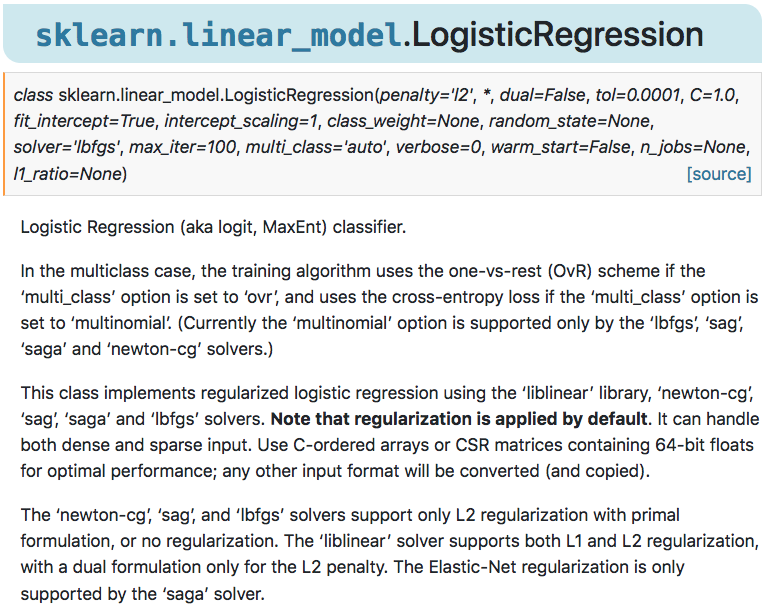

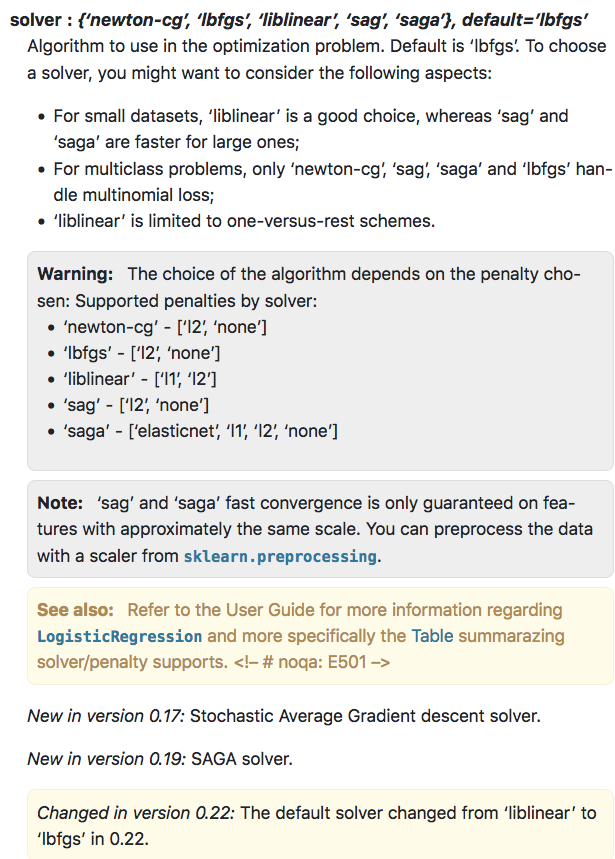

### Build a model to identify Iris-Virginica type based only on the petal width feature

In [1]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2)#.astype(np.int) # 1 if Iris-Virginica, else 0

Train a logistic regression model:

In [130]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)

LogisticRegression()

Let's look at the model's estimated probabilities for flowers with petal wotths varying from 0 to 3cm: 

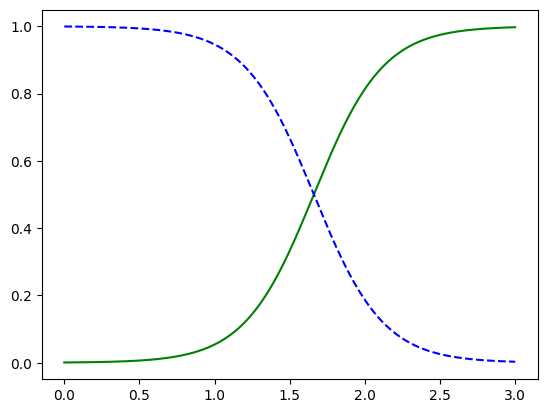

In [131]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

import matplotlib.pyplot as plt
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica");

Adding more to the figure: 

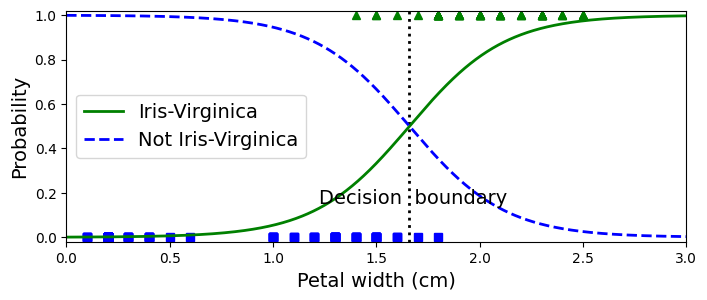

In [132]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

> The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. 

> Notice that there is a bit of overlap. Above about 2 cm the classifier is highly confident that the flower is an Iris- Virginica (it outputs a high probability to that class), while below 1 cm it is **highly confident** that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica” class). In between these extremes, the classifier is **unsure**. However, if you ask it to predict the class (using the ```predict()``` method rather than the ```predict_proba()``` method), it will return whichever class is the most likely. Therefore, there is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris- Virginica, or else it will predict that it is not (even if it is not very confident):

In [133]:
decision_boundary

array([1.66066066])

In [134]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

### New model with petal width and petal lenght

In [135]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2)

log_reg = LogisticRegression(solver="liblinear", C=10**10
                             ,random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10000000000, random_state=42, solver='liblinear')

Generate some test data:

In [136]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1)
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

Plot the data and the boundary:

Text(0, 0.5, 'Petal width')

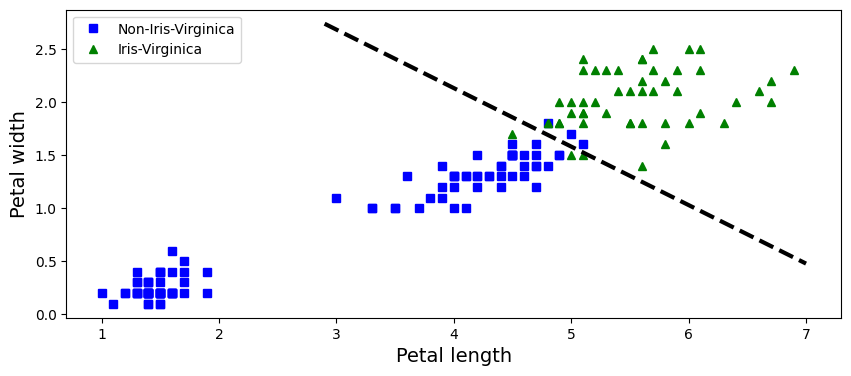

In [137]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^") # y=1 is virginica
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
left_right = np.array([2.9, 7])
plt.plot(left_right, boundary, "k--", linewidth=3)
# good to have
plt.legend(["Non-Iris-Virginica","Iris-Virginica"], loc="best") # y=1 is virginica
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

In this figure the dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. Note that it is a linear boundary. 


Same plot, with some added extras: 

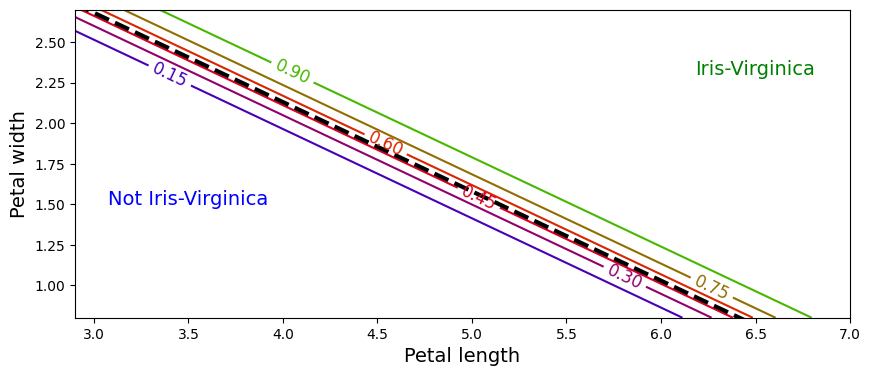

In [104]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right). All the flowers beyond the top-right line have an over 90% chance of being Iris-Virginica according to the model.

### Regularization

Logistic Regression models can be regularized using l1 or l2 penalties. Scitkit-Learn actually adds an l2 penalty by default. The hyperparameter controlling the regularization strength of a Scikit-Learn ```LogisticRegression``` model is not alpha (as in other linear models), but its inverse:```C```. The higher the value of ```C```, the less the model is regularized.

In [105]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

regular_reg = LogisticRegression(multi_class="multinomial"
                                 ,solver="lbfgs", C=10, random_state=42)
regular_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

Test a new sample of flower, with measurements petal lenght 5cm and width 2cm. Predict its class and find the probability of the sample of belonging to Iris Virginica class!

In [106]:
regular_reg.predict([[5, 2]])

array([2])

In [107]:
regular_reg.predict_proba([[5, 2]]) 

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

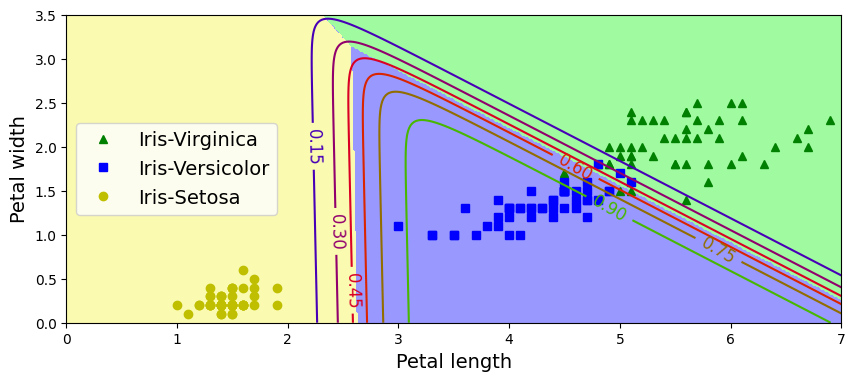

In [108]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = regular_reg.predict_proba(X_new)
y_predict = regular_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

Using the regularized model test a new sample of flower, with measurements petal lenght 5cm and width 2cm. Predict its class and find the probability of the sample of belonging to Iris Virginica class!

In [109]:
regular_reg.predict([[5, 2]])

array([2])

In [110]:
iris.target_names[regular_reg.predict([[5, 2]])]

array(['virginica'], dtype='<U10')

In [111]:
regular_reg.predict_proba([[5, 2]]) 

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [112]:
classProbabilities = regular_reg.predict_proba([[5, 2]])[0]
for i in range(len(classProbabilities)):
    print ('Probability of belonging to %s class is %s%%' % (iris.target_names[i],round(classProbabilities[i]*100,2)))

Probability of belonging to setosa class is 0.0%
Probability of belonging to versicolor class is 5.75%
Probability of belonging to virginica class is 94.25%


The model is 94.25% sure that the sample with measurements petal lenght 5cm and width 2cm belongs to the virginica class.